# FUNDAMENTAL OF DATA SCIENCE PROJECT 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Import important libraries and Load the dataset

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [47]:
# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Weather Training Data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Weather Test Data.csv')

## Data Information

In [ ]:
# First 5 rows on train dataset
train_df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
len(train_df.columns)

23

In [ ]:
# Information on train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [52]:
# Description of numerical attributes in the training dataset
train_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [ ]:
# Generate the description of numerical attributes
description = test_df.describe()

# Save the description to an Excel file
description.to_excel('/content/drive/MyDrive/Colab Notebooks/FDS Projects/test_data_description.xlsx')

print("Test data description saved to 'test_data_description.xlsx'.")

In [57]:
# Create the DataFrame from the CSV description train data
data = {
    'Attributes': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'MinTemp': [99073.0, 12.176265985687321, 6.390882290565264, -8.5, 7.6, 12.0, 16.8, 33.9],
    'MaxTemp': [99286.0, 23.21851318413472, 7.115072398372777, -4.1, 17.9, 22.6, 28.2, 48.1],
    'Rainfall': [98537.0, 2.353023737276353, 8.487865726637203, 0.0, 0.0, 0.0, 0.8, 371.0],
    'Evaporation': [56985.0, 5.46131964552075, 4.162490444622892, 0.0, 2.6, 4.8, 7.4, 86.2],
    'Sunshine': [52199.0, 7.6150903274009085, 3.783007646224735, 0.0, 4.8, 8.4, 10.6, 14.5],
    'WindGustSpeed': [93036.0, 39.97696590567092, 13.581523508538458, 6.0, 31.0, 39.0, 48.0, 135.0],
    'WindSpeed9am': [98581.0, 14.00484880453637, 8.902322502301923, 0.0, 7.0, 13.0, 19.0, 130.0],
    'WindSpeed3pm': [97681.0, 18.65046426633634, 8.801827206720244, 0.0, 13.0, 19.0, 24.0, 87.0],
    'Humidity9am': [98283.0, 68.86637567025834, 19.074951346357114, 0.0, 57.0, 70.0, 83.0, 100.0],
    'Humidity3pm': [97010.0, 51.43329553654262, 20.77761619524107, 0.0, 37.0, 52.0, 65.0, 100.0],
    'Pressure9am': [89768.0, 1017.6846381784158, 7.110166247607892, 980.5, 1013.0, 1017.7, 1022.4, 1041.0],
    'Pressure3pm': [89780.0, 1015.2862042214302, 7.045188770220091, 978.2, 1010.5, 1015.3, 1020.0, 1039.6],
    'Cloud9am': [61944.0, 4.447985277024409, 2.8865800508918307, 0.0, 1.0, 5.0, 7.0, 9.0],
    'Cloud3pm': [59514.0, 4.519121551231643, 2.7166180145495407, 0.0, 2.0, 5.0, 7.0, 9.0],
    'Temp9am': [98902.0, 16.97004105073709, 6.488960793858915, -7.0, 12.3, 16.7, 21.5, 40.2],
    'Temp3pm': [97612.0, 21.681340408966108, 6.9316814716127775, -5.1, 16.6, 21.1, 26.4, 46.7],
    'RainTomorrow': [99516.0, 0.22467743880381044, 0.4173718219537549, 0.0, 0.0, 0.0, 0.0, 1.0]
}

# Create the DataFrame and set 'Attribute' as the index
df = pd.DataFrame(data)
df.set_index('Attributes', inplace=False)

# Transpose the DataFrame
df = df.transpose()

# Save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/Colab Notebooks/FDS Projects/data_description.xlsx', index=False)

print("Data description saved to 'data_description.xlsx'.")

Data description saved to 'data_description.xlsx'.


In [46]:
# Description of categorical attributes in the training dataset
train_df.describe(include=['object'])

,row ID,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,99516,99516,99516,99516,99516,99516
unique,99516,49,16,16,16,2
top,Row0,canberra,W,N,SE,No
freq,1,2393,13364,15058,10058,77460


In [ ]:
# Check missing values in the training dataset
missing_values_train = train_df.isnull().sum()
print("Missing Values in Training Dataset:")
print(missing_values_train)

Missing Values in Training Dataset:
row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64


In [ ]:
# First 5 rows on train dataset
test_df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [ ]:
len(test_df.columns)

22

In [ ]:
# Information on train dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [ ]:
# Description of numerical attributes in the test dataset
test_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,42483.000000,42585.000000,42250.000000,24365.000000,22178.000000,39887.000000,42264.000000,41882.000000,42136.000000,41573.000000,38411.000000,38432.000000,26592.000000,25585.000000,42387.000000,41855.000000
mean,12.210032,23.246068,2.342862,5.489715,7.647831,40.001379,13.995315,18.607516,68.791176,51.597672,1017.581591,1015.192792,4.412041,4.466054,17.028266,21.700982
std,6.432122,7.123596,8.412106,4.248850,3.778019,13.605915,8.872445,8.806916,18.996115,20.844525,7.094070,7.016408,2.887927,2.729640,6.501771,6.951426
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,982.200000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.800000,21.100000
75%,16.900000,28.300000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000
max,31.800000,47.000000,278.400000,145.000000,14.300000,122.000000,74.000000,83.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,8.000000,39.400000,45.400000


In [63]:
# Create the DataFrame from the updated CSV description data
data = {
    'Attributes': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'MinTemp': [42483.0, 12.210032248193395, 6.432121640008105, -8.2, 7.6, 12.0, 16.9, 31.8],
    'MaxTemp': [42585.0, 23.24606786427146, 7.123596236045881, -4.8, 18.0, 22.6, 28.3, 47.0],
    'Rainfall': [42250.0, 2.3428615384615386, 8.412105837942638, 0.0, 0.0, 0.0, 0.6, 278.4],
    'Evaporation': [24365.0, 5.489714754771188, 4.248849509250145, 0.0, 2.6, 4.8, 7.4, 145.0],
    'Sunshine': [22178.0, 7.647831184056271, 3.778018746882988, 0.0, 4.9, 8.5, 10.7, 14.3],
    'WindGustSpeed': [39887.0, 40.001378895379446, 13.605914806418548, 7.0, 31.0, 39.0, 48.0, 122.0],
    'WindSpeed9am': [42264.0, 13.995315161839864, 8.872444822671216, 0.0, 7.0, 13.0, 19.0, 74.0],
    'WindSpeed3pm': [41882.0, 18.607516355474907, 8.806915848592858, 0.0, 13.0, 19.0, 24.0, 83.0],
    'Humidity9am': [42136.0, 68.79117619138029, 18.996115195779865, 1.0, 57.0, 70.0, 83.0, 100.0],
    'Humidity3pm': [41573.0, 51.59767156567965, 20.844525483441362, 1.0, 37.0, 52.0, 66.0, 100.0],
    'Pressure9am': [38411.0, 1017.581591210851, 7.094069990680865, 982.2, 1012.9, 1017.6, 1022.4, 1040.4],
    'Pressure3pm': [38432.0, 1015.1927918661534, 7.016408003244278, 977.1, 1010.4, 1015.2, 1020.0, 1038.9],
    'Cloud9am': [26592.0, 4.4120412154031285, 2.8879274609743693, 0.0, 1.0, 5.0, 7.0, 8.0],
    'Cloud3pm': [25585.0, 4.4660543287082275, 2.7296404237065874, 0.0, 2.0, 5.0, 7.0, 8.0],
    'Temp9am': [42387.0, 17.028265741854817, 6.5017709256043625, -7.2, 12.3, 16.8, 21.6, 39.4],
    'Temp3pm': [41855.0, 21.70098196153387, 6.951426386081016, -5.4, 16.6, 21.1, 26.5, 45.4]
}

# Create the DataFrame and set 'Attributes' as the index
df = pd.DataFrame(data)
df.set_index('Attributes', inplace=False)

# Transpose the DataFrame
df = df.transpose()

# Save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/Colab Notebooks/FDS Projects/data_description.xlsx')

print("Data description saved to 'data_description.xlsx'.")

Data description saved to 'data_description.xlsx'.


In [ ]:
# Description of categorical attributes in the test dataset
test_df.describe(include=['object'])

,row ID,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,42677,42677,39868,39670,41547,42250
unique,42677,49,16,16,16,2
top,Row0,Canberra,W,N,SE,No
freq,1,1025,2937,3341,3253,32851


In [ ]:
# Check missing values in the test dataset
missing_values_test = test_df.isnull().sum()
print("Missing Values in Test Dataset:")
print(missing_values_test)

Missing Values in Test Dataset:
row ID               0
Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64


## Data Cleaning

In [9]:
# Check for duplicates in the training dataset
train_duplicates = train_df.duplicated()
num_train_duplicates = train_duplicates.sum()
print(f'Number of duplicate rows in the training dataset: {num_train_duplicates}')

# Display the duplicate rows in the training dataset if any
if num_train_duplicates > 0:
    print("Duplicate rows in the training dataset:")
    print(train_df[train_duplicates])

# Check for duplicates in the test dataset
test_duplicates = test_df.duplicated()
num_test_duplicates = test_duplicates.sum()
print(f'Number of duplicate rows in the test dataset: {num_test_duplicates}')

# Display the duplicate rows in the test dataset if any
if num_test_duplicates > 0:
    print("Duplicate rows in the test dataset:")
    print(test_df[test_duplicates])

Number of duplicate rows in the training dataset: 0
Number of duplicate rows in the test dataset: 0


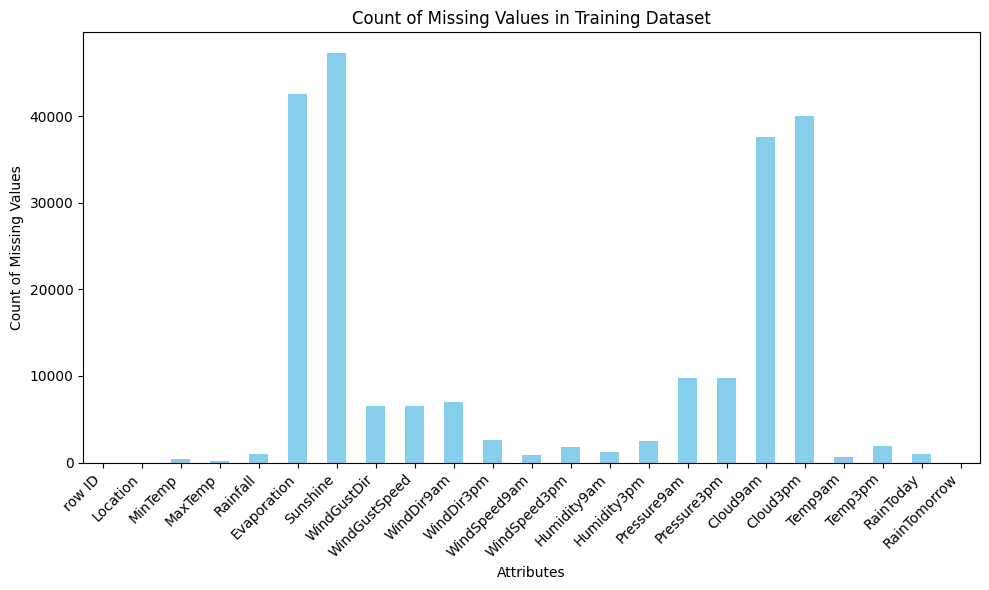

In [ ]:
# Plot count of missing values on Training dataset
plt.figure(figsize=(10, 6))
missing_values_train.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values in Training Dataset')
plt.xlabel('Attributes')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

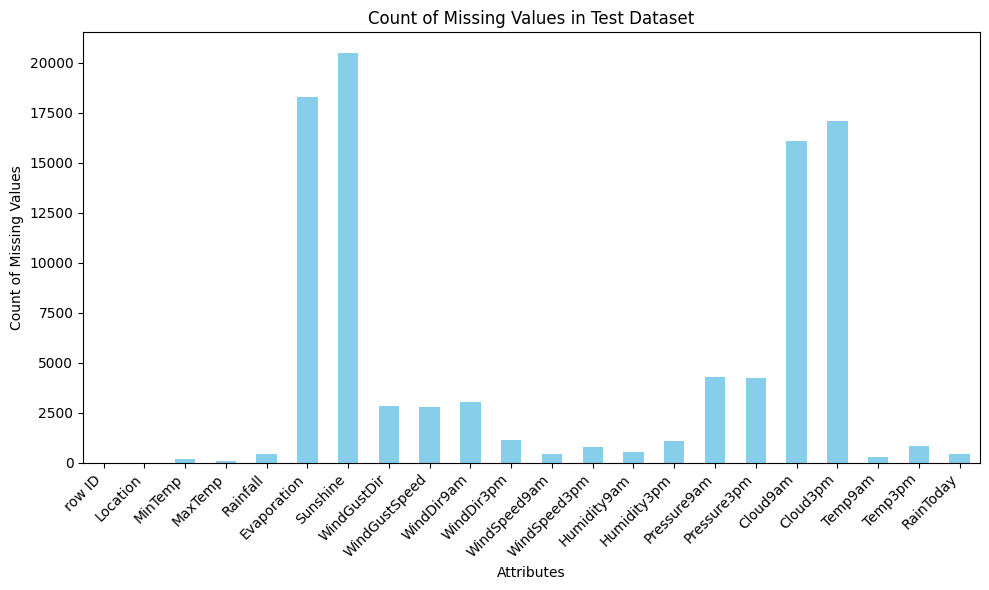

In [ ]:
# Plot count of missing values
plt.figure(figsize=(10, 6))
missing_values_test.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values in Test Dataset')
plt.xlabel('Attributes')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# Function to handle missing values
def handle_missing_values(df):
    print("Before missing values handling:", df.shape)
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
    print("After missing values handling:", df.shape)
    return df

# Function to handle inconsistent data
def handle_inconsistent_data(df):
    print("Before inconsistent data handling:", df.shape)
    df['Location'] = df['Location'].str.strip().str.lower()
    print("After inconsistent data handling:", df.shape)
    return df

In [42]:
# Apply missing values handling function to both datasets
train_df = handle_missing_values(train_df)
test_df = handle_missing_values(test_df)

# Apply inconsistent data handling functions to both datasets
train_df = handle_inconsistent_data(train_df)
test_df = handle_inconsistent_data(test_df)

Before missing values handling: (99516, 23)
After missing values handling: (99516, 23)
Before missing values handling: (42677, 22)
After missing values handling: (42677, 22)
Before inconsistent data handling: (99516, 23)
After inconsistent data handling: (99516, 23)
Before inconsistent data handling: (42677, 22)
After inconsistent data handling: (42677, 22)


In [ ]:
# Check missing values in the training dataset
missing_values_train = train_df.isnull().sum()
print("Missing Values in Training Dataset:")
print(missing_values_train)

Missing Values in Training Dataset:
row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


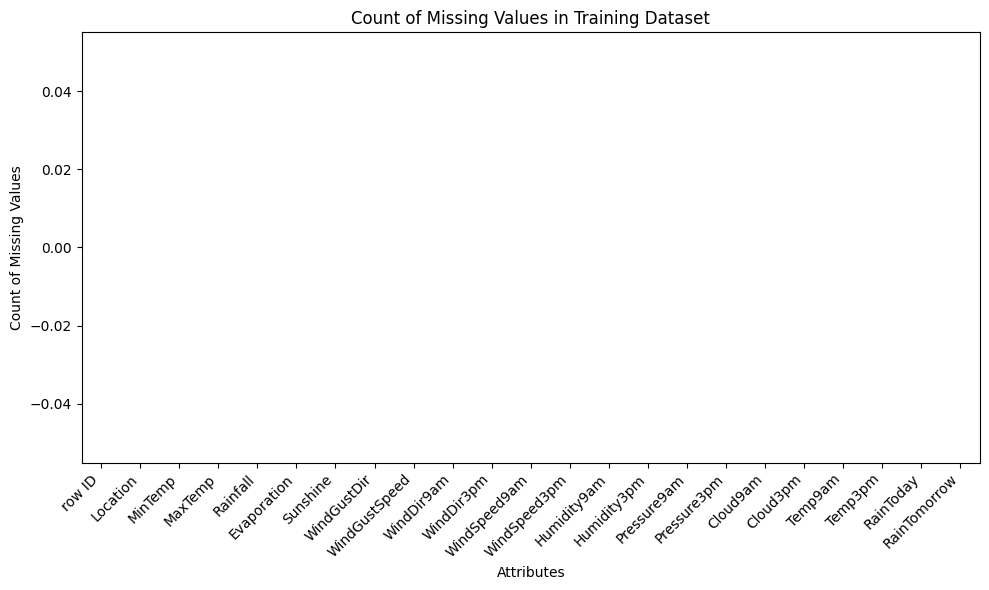

In [ ]:
# Plot count of missing values (which is zero for all attributes)
plt.figure(figsize=(10, 6))
missing_values_train.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values in Training Dataset')
plt.xlabel('Attributes')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Check missing values in the test dataset
missing_values_test = test_df.isnull().sum()
print("Missing Values in Test Dataset:")
print(missing_values_test)

Missing Values in Test Dataset:
row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


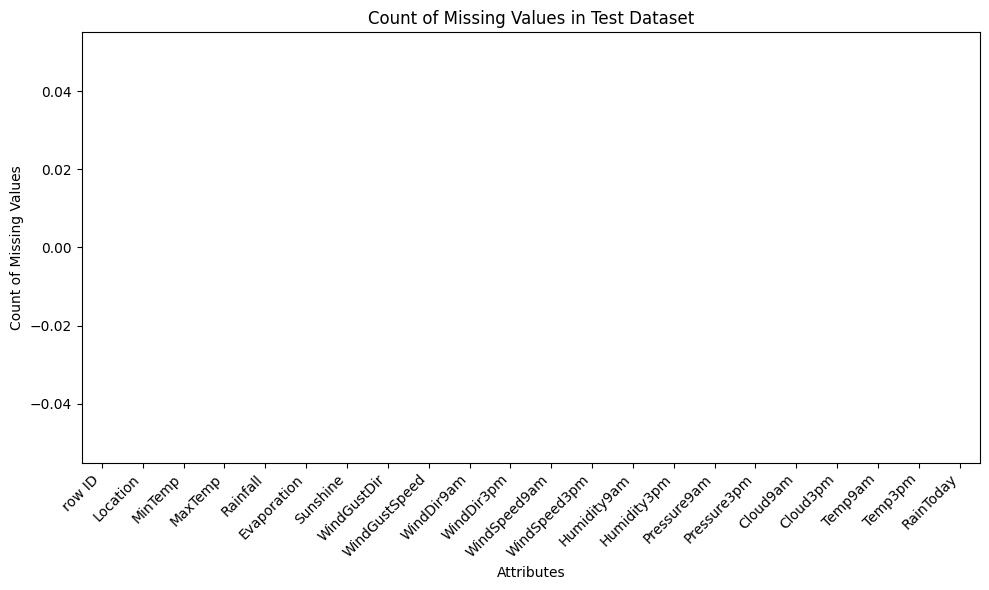

In [ ]:
# Plot count of missing values (which is zero for all attributes)
plt.figure(figsize=(10, 6))
missing_values_test.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values in Test Dataset')
plt.xlabel('Attributes')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Reduction Transformation

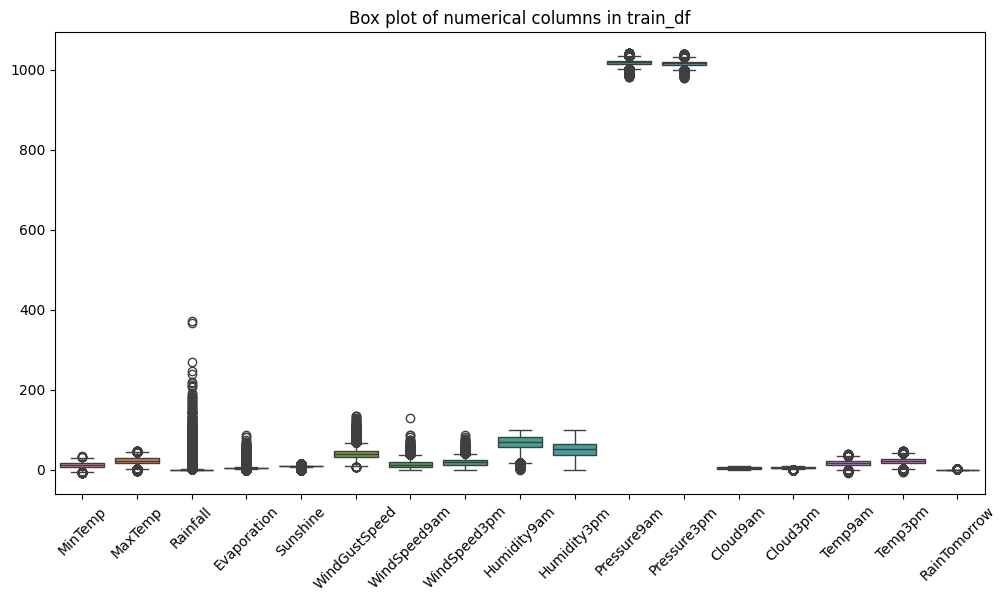

In [ ]:
# Box plot for numerical columns in train_df
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.title('Box plot of numerical columns in train_df')
plt.xticks(rotation=45)
plt.show()

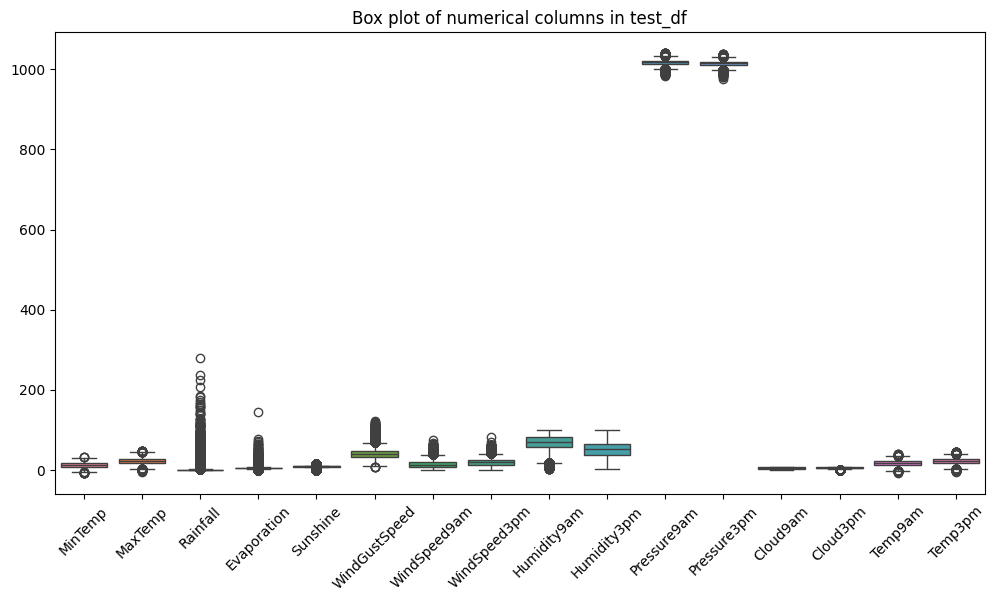

In [ ]:
# Box plot for numerical columns in test_df
plt.figure(figsize=(12, 6))
sns.boxplot(data=test_df.select_dtypes(include=['float64', 'int64']))
plt.title('Box plot of numerical columns in test_df')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Function to plot bar plots for categorical variables
def plot_categorical(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    num_plots = len(categorical_columns)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)  # Calculate number of rows needed for subplots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_title(f'Frequency of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove any empty subplot
    if len(categorical_columns) < len(axes):
        for j in range(len(categorical_columns), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

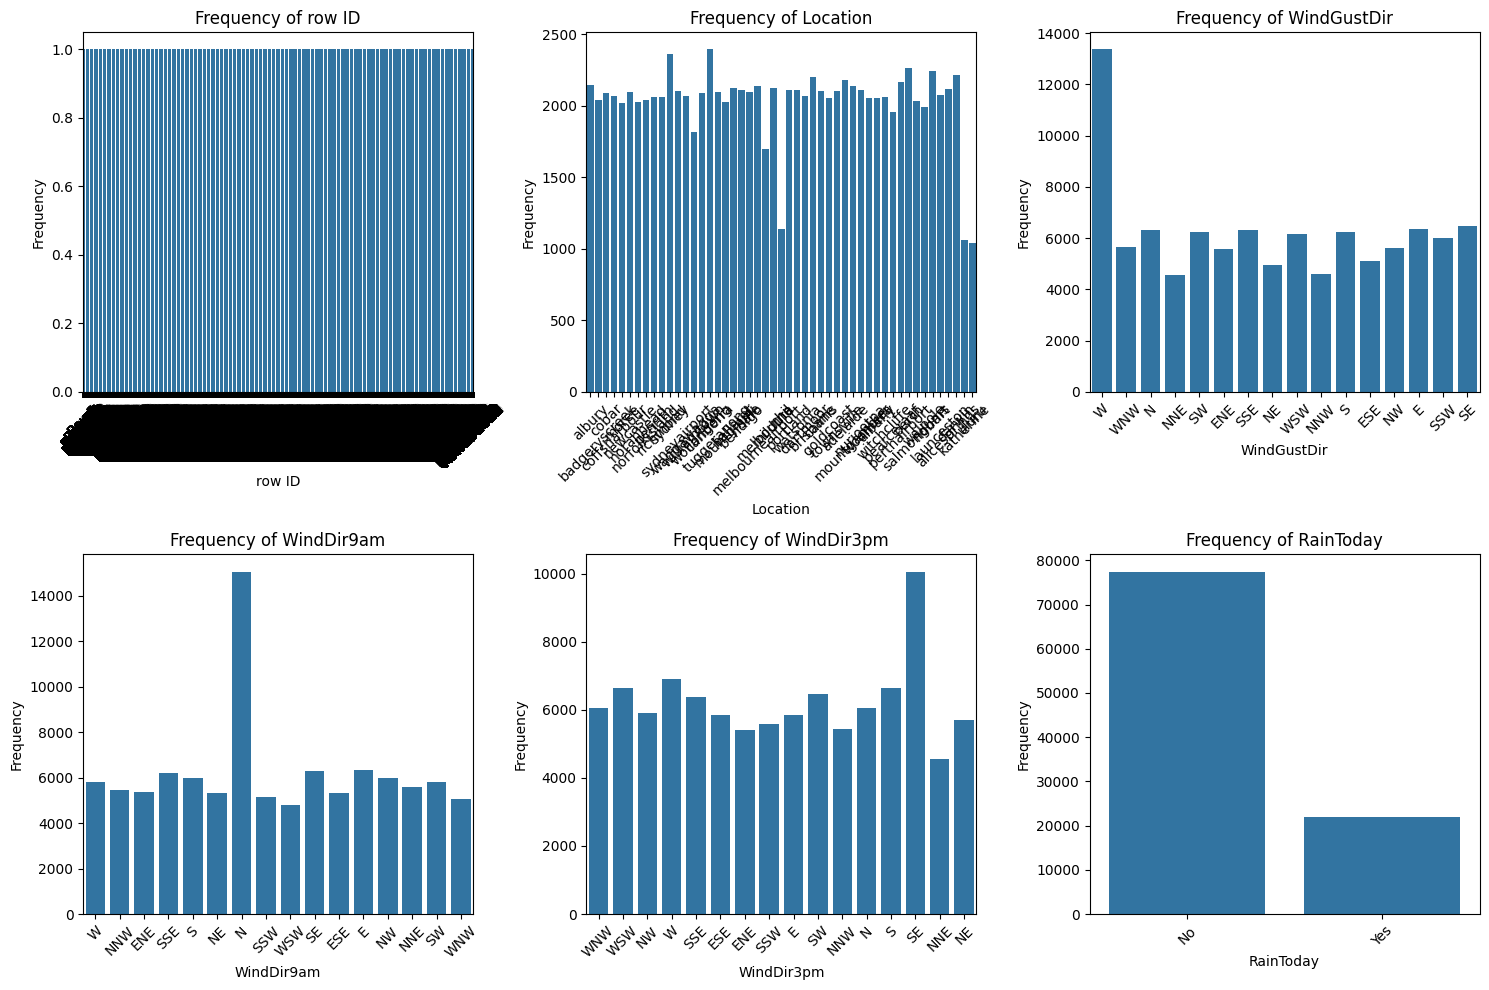

In [ ]:
# Plot bar plots for categorical variables in the training dataset
plot_categorical(train_df)

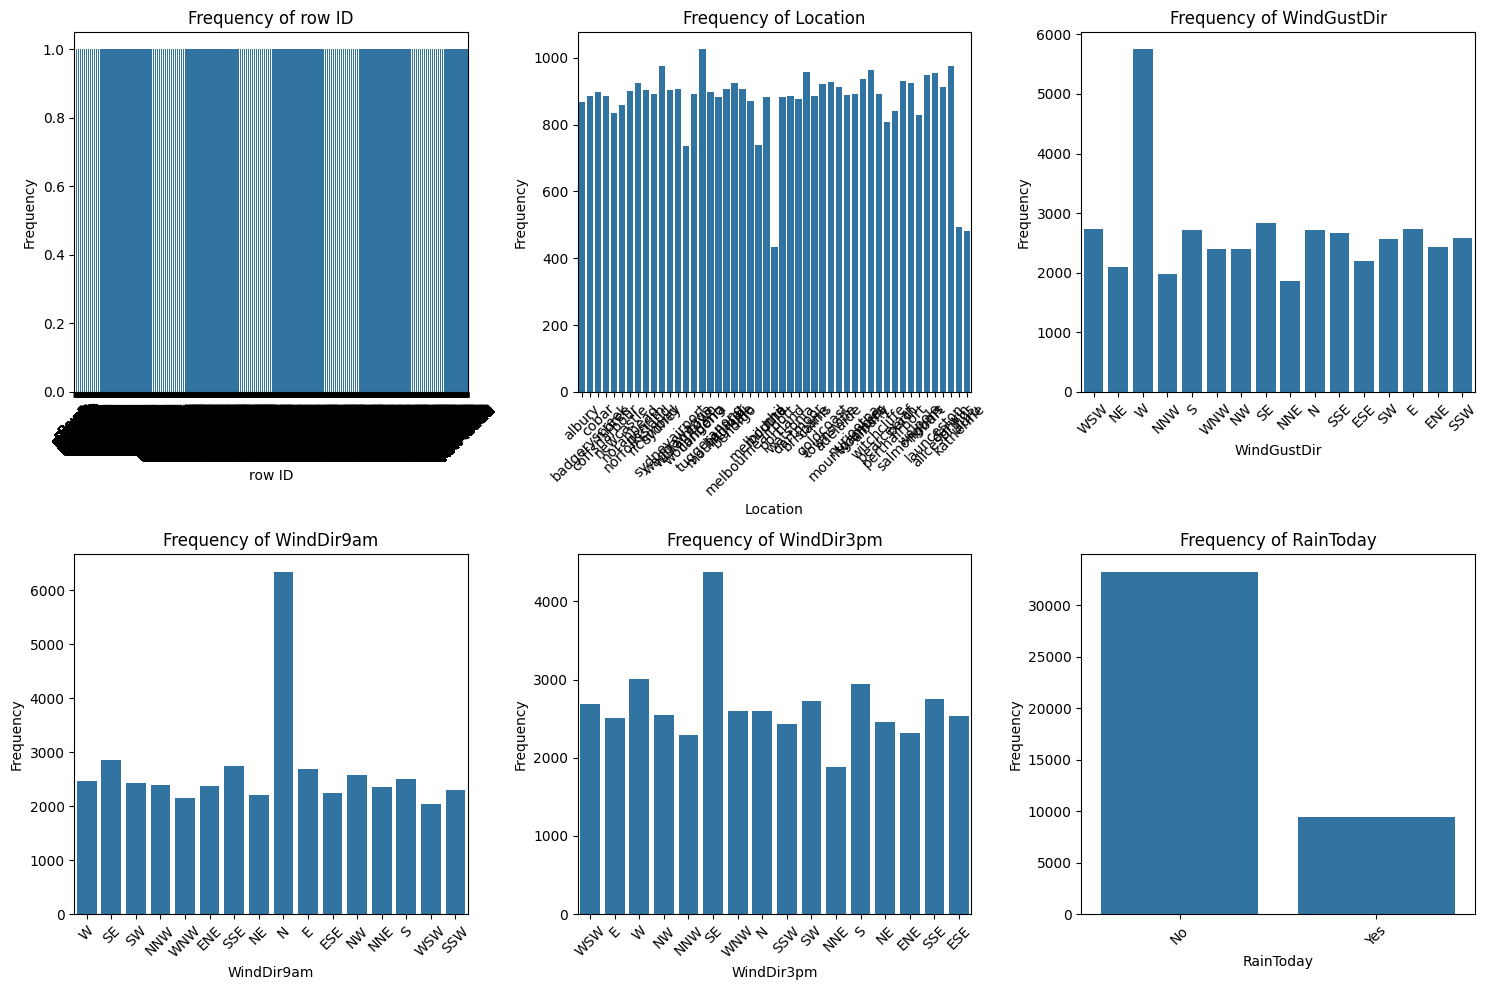

In [ ]:
# Plot bar plots for categorical variables in the test dataset
plot_categorical(test_df)

In [43]:
# Function to preprocess data
def preprocess_data(train_df, test_df):
    # Separate features and target variable
    y_train = train_df['RainTomorrow']
    X_train = train_df.drop(columns=['row ID', 'RainTomorrow'])
    X_test = test_df.drop(columns=['row ID'])

    # Apply LabelEncoder to 'RainToday' attribute
    le = LabelEncoder()
    X_train['RainToday'] = le.fit_transform(X_train['RainToday'])
    X_test['RainToday'] = le.transform(X_test['RainToday'])

    # Apply OrdinalEncoder to wind direction attributes
    windir_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
    wind_categories = [['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']] * len(windir_columns)
    oe = OrdinalEncoder(categories=wind_categories)
    X_train[windir_columns] = oe.fit_transform(X_train[windir_columns])
    X_test[windir_columns] = oe.transform(X_test[windir_columns])

    # Ensure no missing values in encoded columns
    categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Location']
    for col in categorical_columns:
        X_train[col].fillna(-1, inplace=True)  # Using -1 to indicate unmapped values
        X_test[col].fillna(-1, inplace=True)   # Using -1 to indicate unmapped values

    # Specify the indices of categorical features including 'Location'
    categorical_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

    # Apply SMOTENC to balance classes in the training dataset
    smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
    X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

    return X_train_resampled, y_train_resampled, X_test, X_train.columns

# Perform data preprocessing
X_train_resampled, y_train_resampled, X_test_preprocessed, feature_names = preprocess_data(train_df.copy(), test_df.copy())

## Results Presentation and Visualization

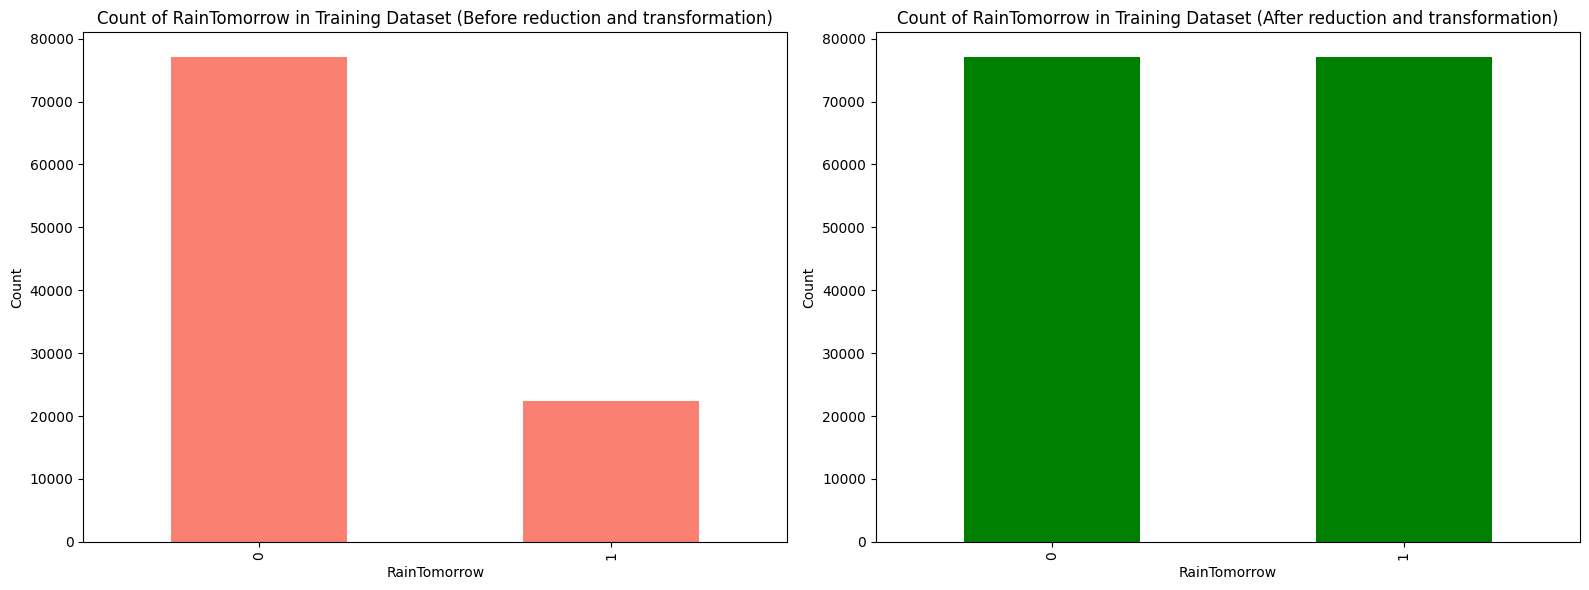

In [44]:
# Plot histogram of 'RainTomorrow' attribute after reduction and transformation
plt.figure(figsize=(16, 6))

# Before Reduction and Transformation
plt.subplot(1, 2, 1)
train_df['RainTomorrow'].value_counts().plot(kind='bar', color='salmon')
plt.title('Count of RainTomorrow in Training Dataset (Before reduction and transformation)')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

# After Reduction and Transformation
plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='green')
plt.title('Count of RainTomorrow in Training Dataset (After reduction and transformation)')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## save Preprocessed dataset for both train and test

In [45]:
# Convert the resampled data to DataFrame
preprocessed_train = pd.DataFrame(X_train_resampled, columns=feature_names)
preprocessed_train['RainTomorrow'] = y_train_resampled

# Ensure 'Location' is the first column
location_train_resampled = preprocessed_train.pop('Location')
preprocessed_train.insert(0, 'Location', location_train_resampled)

# Save the preprocessed training dataset to CSV
preprocessed_train.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/preprocessed_train.csv', index=False)

# Count the instances and attributes in the preprocessed training data
num_train_instances, num_train_attributes = preprocessed_train.shape

# Convert the test data to DataFrame and ensure 'Location' is the first column
preprocessed_test = pd.DataFrame(X_test_preprocessed, columns=feature_names)
location_test = preprocessed_test.pop('Location')
preprocessed_test.insert(0, 'Location', location_test)

# Save the preprocessed test dataset to CSV
preprocessed_test.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/preprocessed_test.csv', index=False)

# Count the instances and attributes in the preprocessed test data
num_test_instances, num_test_attributes = preprocessed_test.shape

# Print the counts of instances and attributes
print("Number of instances in preprocessed training data:", num_train_instances)
print("Number of attributes in preprocessed training data:", num_train_attributes)
print("Number of instances in preprocessed test data:", num_test_instances)
print("Number of attributes in preprocessed test data:", num_test_attributes)
print("Preprocessing complete. /Preprocessed data saved to 'preprocessed_train.csv' and 'preprocessed_test.csv'.")

Number of instances in preprocessed training data: 154314
Number of attributes in preprocessed training data: 22
Number of instances in preprocessed test data: 42677
Number of attributes in preprocessed test data: 21
Preprocessing complete. /Preprocessed data saved to 'preprocessed_train.csv' and 'preprocessed_test.csv'.
